In [27]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
import scipy as sp
import sympy as sym
from scipy.special import binom
from scipy.special import comb

import warnings
warnings.filterwarnings('ignore') #overflow and stuff is gonna happen, might try symbolic versions later

In [4]:
x = np.arange(1,12)
y = np.arange(1,12)
X, Y = np.meshgrid(x, y)

In [5]:
fair = binom(X+Y,X) * (0.5)**(X+Y) / (binom(X+Y,X) * (0.5)**(X+Y) + 1 / (X+Y+1))

Text(0.5,1,'Contour Plot of Probabilities for Fair Coin')

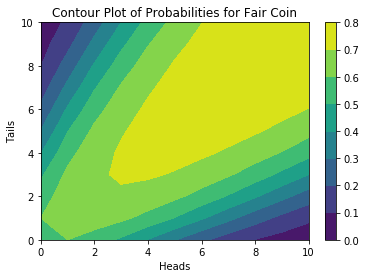

In [16]:
fig, ax = plt.subplots()
fig.patch.set_facecolor('white')
cs = ax.contourf(fair)
fig.colorbar(cs)
ax.set_xlabel("Heads")
ax.set_ylabel("Tails")
ax.set_title("Contour Plot of Probabilities for Fair Coin")

In [24]:
def psfd20(s,f):
    'Probability of s successes and f failures with flat distribution of modifier m'
    total = 0
    for m in range(21):
        total += (m/20)**s * (1-m/20)**f
    return (1/21) * comb(s+f,s, exact=False) * total

def chance_d20(s,f):
    return psfd20(s,f) / (psfd20(s,f) + 1 / (s+f+1))

In [9]:
def chance_d20sym(s,f):
    m = sym.Symbol('m')
    p = comb(s+f,s,exact=True) * sym.Sum(sym.Sum(m, (m, 0, 20)) , (m, 0, 20)) / sym.Integer(21)
    chance = p / (p + 1 / sym.Integer(s+f+1))
    return chance.doit()

In [28]:
x = np.arange(1,800,1)
d20Land = np.zeros([len(x), len(x)])
for i in range(len(x)):
    for j in range(len(x)):
        d20Land[i,j] = chance_d20(i,j)

Text(0,0.5,'Number of Failures')

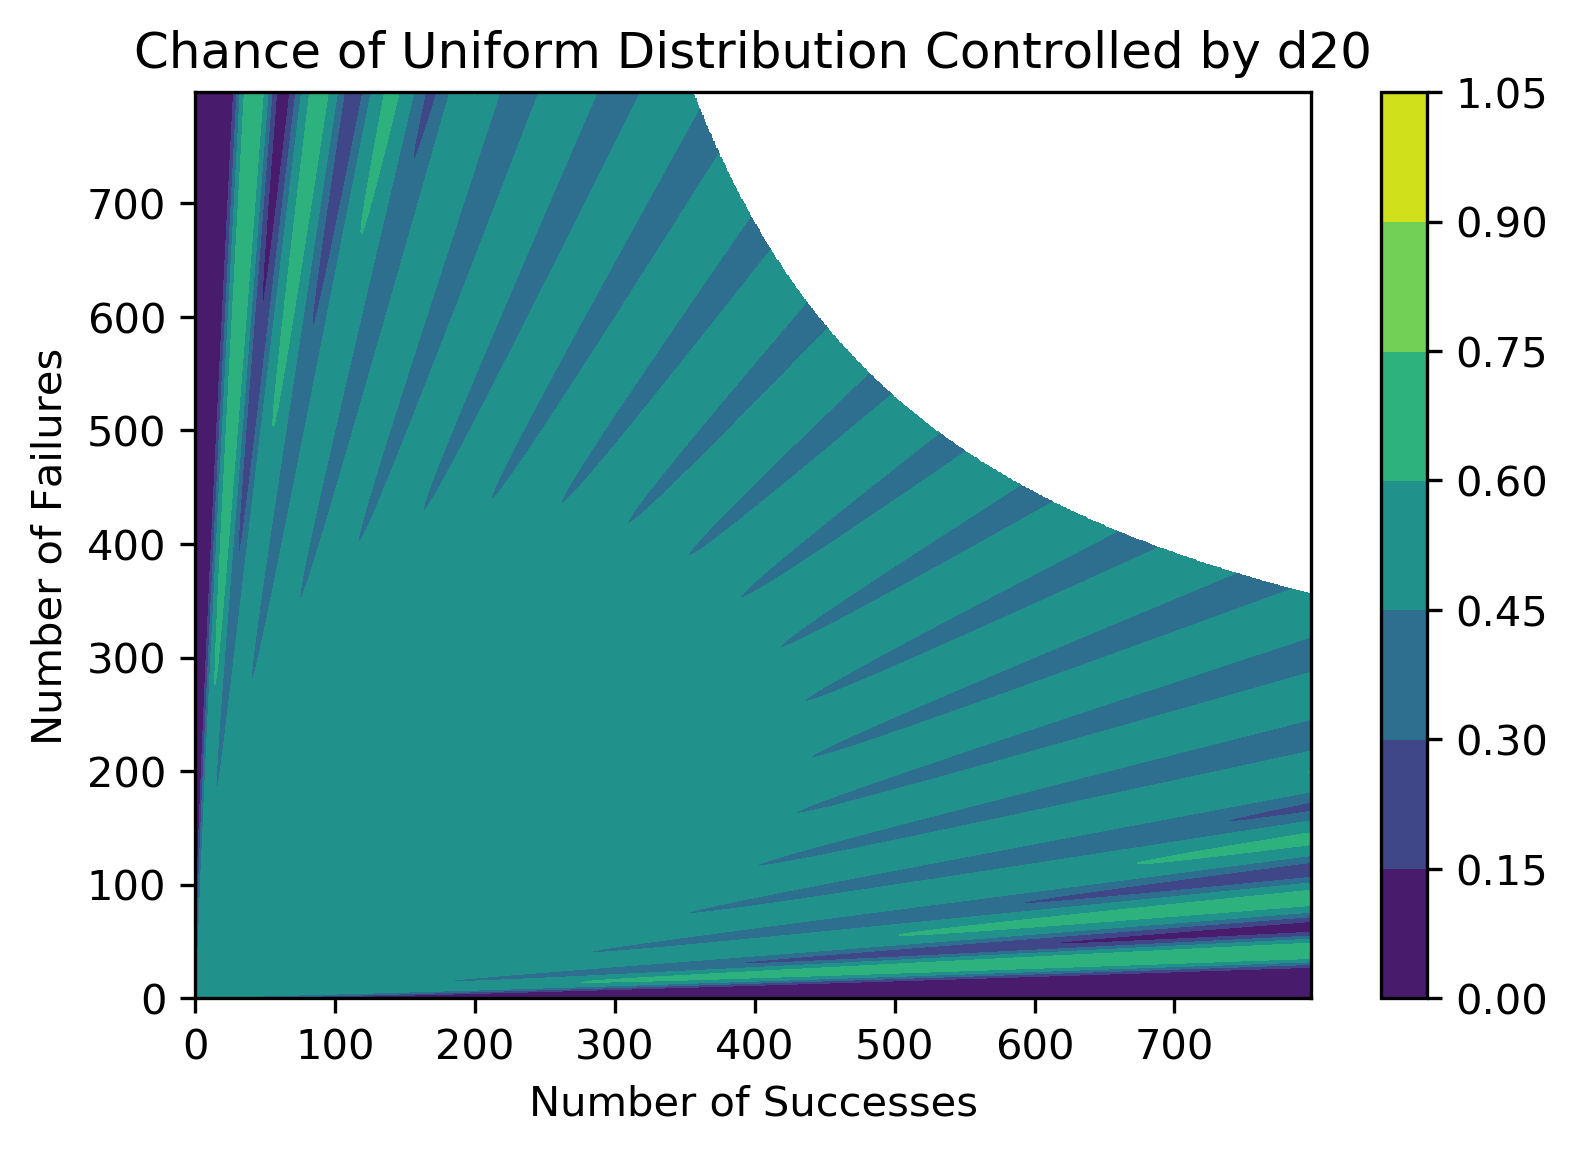

In [29]:
fig, ax = plt.subplots(dpi=300)
fig.patch.set_facecolor('white')
cs = ax.contourf(d20Land)
fig.colorbar(cs)
ax.set_title("Chance of Uniform Distribution Controlled by d20")
ax.set_xlabel("Number of Successes")
ax.set_ylabel("Number of Failures")